In [90]:
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import statsmodels.api as sm
import pylab as pl
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('default_of_credit_card_clients.csv')

In [92]:
df.shape

(30000, 25)

In [93]:
df.head(3) # df.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- For the Education variable,
  1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown,
  0 is not described yet existing, 5 and 6 are unknown
- For the Marriage variable, 1=married, 2=single, 3=others, but in the dataset 0 is existing

In [95]:
df['LIMIT_BAL'].value_counts().head()

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

- The largest number of credit cards are with limit of 50,000

In [96]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [97]:
df.EDUCATION.replace({6:4,5:4,0:4},inplace=True)

In [98]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [99]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [100]:
df.MARRIAGE.replace({0:3},inplace=True)

In [101]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [102]:
df = df.rename(columns={'default payment next month':'default_payment'})
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


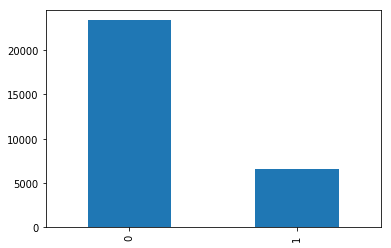

In [103]:
df.default_payment.value_counts().plot.bar()

In [104]:
df.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

In [105]:
data = df.copy()

In [106]:
# Dropping all the PAY_ variables and the rows for which all of the BILL_AMT and PAY_AMT values are together zero's
data = data.drop(columns=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
data1 = data.drop(data[(data['BILL_AMT1']==0) & (data['BILL_AMT2']==0) & (data['BILL_AMT3']==0) & (data['BILL_AMT4']==0) & (data['BILL_AMT5']==0) & (data['BILL_AMT6']==0) & (data['PAY_AMT1']==0) & (data['PAY_AMT2']==0) & (data['PAY_AMT3']==0) & (data['PAY_AMT4']==0) & (data['PAY_AMT5']==0) & (data['PAY_AMT6']==0)].index)
# Dropping all the rows in the BILL_AMT variable having values <=-100
data1 = data1.drop(data1[(data1['BILL_AMT1']<=-100) | (data1['BILL_AMT2']<=-100) | (data1['BILL_AMT3']<=-100) | (data1['BILL_AMT4']<=-100) | (data1['BILL_AMT5']<=-100) | (data1['BILL_AMT6']<=-100)].index)
data1.shape

(28078, 19)

In [107]:
data1.default_payment.value_counts()

0    21957
1     6121
Name: default_payment, dtype: int64

In [108]:
data1 = data1.drop(columns=['ID'])
data1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

In [109]:
data1[data1['default_payment']==0].mean()

LIMIT_BAL          176717.766544
SEX                     1.615567
EDUCATION               1.834404
MARRIAGE                1.565833
AGE                    35.407979
BILL_AMT1           54419.612333
BILL_AMT2           52090.801658
BILL_AMT3           49666.368356
BILL_AMT4           45776.754657
BILL_AMT5           42510.143417
BILL_AMT6           40975.794234
PAY_AMT1             6394.128569
PAY_AMT2             6543.922212
PAY_AMT3             5780.475839
PAY_AMT4             5266.212825
PAY_AMT5             5288.281277
PAY_AMT6             5711.159402
default_payment         0.000000
dtype: float64

In [110]:
data1[data1['default_payment']==1].mean()

LIMIT_BAL          123518.653815
SEX                     1.565104
EDUCATION               1.907368
MARRIAGE                1.532919
AGE                    35.539128
BILL_AMT1           51928.502369
BILL_AMT2           50771.752328
BILL_AMT3           48660.742852
BILL_AMT4           45294.381474
BILL_AMT5           42622.479987
BILL_AMT6           41255.425257
PAY_AMT1             3563.890704
PAY_AMT2             3478.212057
PAY_AMT3             3466.274302
PAY_AMT4             3258.505146
PAY_AMT5             3259.334913
PAY_AMT6             3407.545499
default_payment         1.000000
dtype: float64

- People with less education have more probability of default
- People who are defaulting are paying less amount as compared to the one's that are not defaulting, which is as expected

In [111]:
pd.crosstab(data1.SEX,data1.default_payment)

default_payment,0,1
SEX,,
1,8441,2662
2,13516,3459


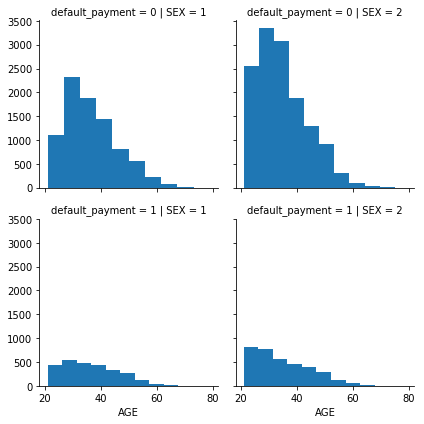

In [112]:
g = sns.FacetGrid(data1, row='default_payment', col='SEX')
g = g.map(plt.hist, 'AGE')

- Females of age group 20-30 have very high tendency to default payment compared to males

In [113]:
data1[['SEX', 'default_payment']].groupby(['SEX']).mean().sort_values(by='default_payment') # prob for each gender to default

,default_payment
SEX,
2,0.203770
1,0.239755


- Men are most likely to default next month 

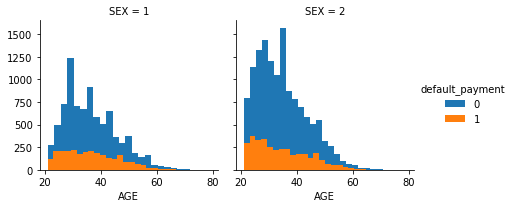

In [114]:
g = sns.FacetGrid(data1, col='SEX', hue='default_payment')
g.map(plt.hist, 'AGE', bins=25)
g.add_legend()

In [115]:
pd.crosstab(data1.MARRIAGE,data1.default_payment)

default_payment,0,1
MARRIAGE,,
1,9804,2941
2,11882,3098
3,271,82


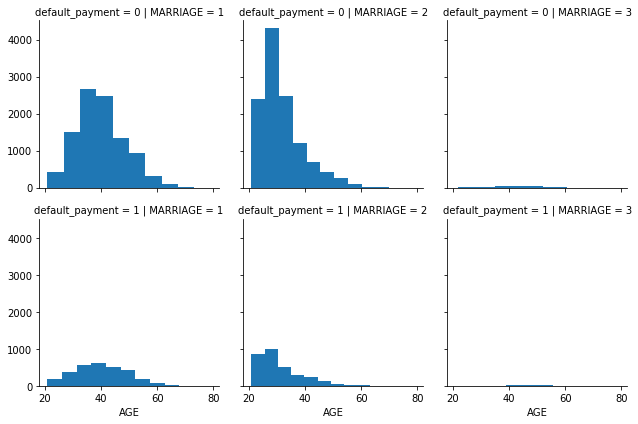

In [116]:
g = sns.FacetGrid(data1, row='default_payment', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

- Married people between age 30-50 and unmarried people of age 20-30 tend to default payment with unmarried clients having higher probability of default

In [117]:
data1[['MARRIAGE', 'default_payment']].groupby(['MARRIAGE']).mean().sort_values(by='default_payment') # prob for each marital status to default

,default_payment
MARRIAGE,
2,0.206809
1,0.230757
3,0.232295


- Singles are less likely to default

In [118]:
pd.crosstab(data1.EDUCATION,data1.default_payment)

default_payment,0,1
EDUCATION,,
1,7916,1784
2,10164,3153
3,3474,1151
4,403,33


In [119]:
data1[['EDUCATION', 'default_payment']].groupby(['EDUCATION']).mean().sort_values(by='default_payment') # prob for each education level to default

,default_payment
EDUCATION,
4,0.075688
1,0.183918
2,0.236765
3,0.248865


- People with higher education are less likely to default

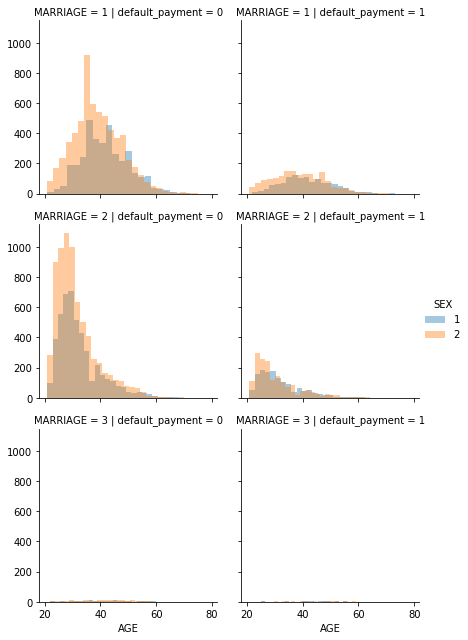

In [120]:
g = sns.FacetGrid(data1, col='default_payment', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.4, bins=25) 
g.add_legend()

- Looks like married men are more likely to deafult 

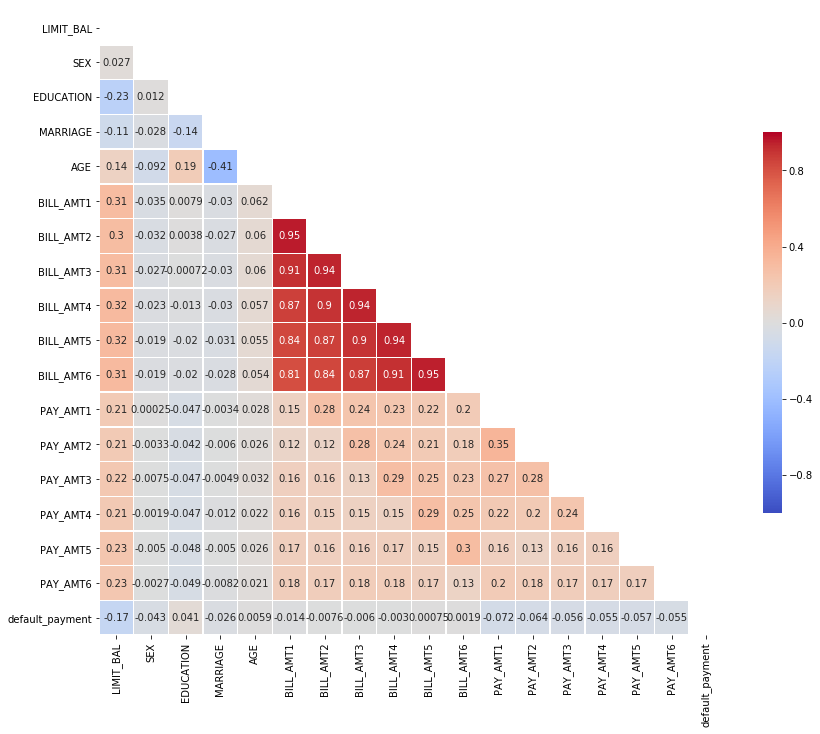

In [121]:
corr = data1.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, ax = ax, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

- Correlation plot says default payment has no correlation with BILL_AMT2...6 and AGE 

In [122]:
#cat_vars = data1[['SEX','EDUCATION','MARRIAGE']]
#cat_vars.head()

data2 = data1.copy()

In [123]:
data2.SEX = data2.SEX.astype(str)
data2.EDUCATION = data2.EDUCATION.astype(str)
data2.MARRIAGE = data2.MARRIAGE.astype(str)

In [124]:
cont_vars = data2.select_dtypes(include=['int64'])

In [125]:
obj_data = data2.select_dtypes(include=['object']).copy()
obj_data = pd.get_dummies(obj_data, prefix=['Sex', 'Education','Marriage'])
obj_data.head()

,Sex_1,Sex_2,Education_1,Education_2,Education_3,Education_4,Marriage_1,Marriage_2,Marriage_3
0,0,1,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0


- Sex_1 = Male
- Education_1 = Grad school
- Marriage_1 = Married

In [126]:
cont_vars.reset_index(drop=True, inplace=True)
obj_data.reset_index(drop=True, inplace=True)
df2 = pd.concat([cont_vars,obj_data], axis=1)
df2.head(2)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,default_payment,Sex_1,Sex_2,Education_1,Education_2,Education_3,Education_4,Marriage_1,Marriage_2,Marriage_3
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,1,0,1,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,1,0,1,0,0,0,1,0


### Model1
- Model with all variables

In [127]:
x = df2.drop(columns = ['default_payment'])
y = df2['default_payment']

In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [129]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print('Model Accuracy: ', accuracy_score(ypred,ytest))
param = model.coef_
print('Classification Report:\n',classification_report(ypred,ytest))
print('Confusion Matrix:\n',confusion_matrix(ypred, ytest))

Model Accuracy:  0.7840099715099715
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      5615
           1       0.00      1.00      0.00         1

    accuracy                           0.78      5616
   macro avg       0.50      0.89      0.44      5616
weighted avg       1.00      0.78      0.88      5616

Confusion Matrix:
 [[4402 1213]
 [   0    1]]


- Since we are dealing with class-imbalance accuracy is not the best metric. Other performance metrics like confusion matrix, precision, recall, f-score, ROC curves can give useful insights

In [130]:
ytest.value_counts()

0    4402
1    1214
Name: default_payment, dtype: int64

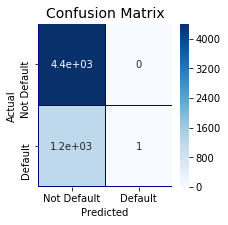

In [131]:
cm = pd.crosstab(ytest, ypred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(3,3))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [132]:
# TP  FN
# FP  TN
# Actual not default and predicted not default = 4402 = TP
# Actual default and predicted not default = 1213 = FN
# Actual default and predicted default = 1 = TN
# Actual not default and predicted default = 0 = FP
# Recall = TP/(TP+FN) = 0.78
# Precision = TP/(TP+FP) = 1
# f1-score = 2(Precision*Recall)/(Precision+Recall) = 0.88
# True Positive (TP) : Observation is positive, and is predicted to be positive
# False Negative (FN) : Observation is positive, but is predicted negative
# True Negative (TN) : Observation is negative, and is predicted to be negative
# False Positive (FP) : Observation is negative, but is predicted positive

# False Positive - Type 1 error - Rejecting a true null
# Flase Negative - Type 2 error - Not rejecting a false null

In [133]:
from sklearn.metrics import f1_score
f1_score(y_true = ytest, y_pred = ypred)

0.0016460905349794238

In [134]:
param

array([[-3.71285686e-06, -1.59721940e-02, -8.83606106e-06,
         4.30111755e-06,  3.27676775e-06,  1.51825983e-06,
         3.45487495e-06,  2.04408291e-06, -2.83447614e-05,
        -2.41705150e-05, -5.74912610e-06, -9.86472705e-06,
        -9.10716634e-06, -3.01469777e-06, -6.13486244e-05,
        -6.17142685e-04, -1.98463109e-04, -3.44729062e-04,
        -7.02277479e-05, -6.50713910e-05,  1.08699677e-04,
        -7.78623545e-04, -8.56744184e-06]])

- Note: If AUROC is 0.47, it just means that predictions have to be inverted because Scikit-Learn is misinterpreting the positive class. AUROC should always be >= 0.5 

### Model 2
- Model with balance amt for each month (bill_amt-pay_amt)

In [135]:
xx = x.copy()
yy = y.copy()

In [136]:
xx['Bal1'] = xx['BILL_AMT1']-xx['PAY_AMT1']
xx['Bal2'] = xx['BILL_AMT2']-xx['PAY_AMT2']
xx['Bal3'] = xx['BILL_AMT3']-xx['PAY_AMT3']
xx['Bal4'] = xx['BILL_AMT4']-xx['PAY_AMT4']
xx['Bal5'] = xx['BILL_AMT5']-xx['PAY_AMT5']
xx['Bal6'] = xx['BILL_AMT6']-xx['PAY_AMT6']
xx = xx.drop(columns=['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

In [137]:
xx.head()

,LIMIT_BAL,AGE,Sex_1,Sex_2,Education_1,Education_2,Education_3,Education_4,Marriage_1,Marriage_2,Marriage_3,Bal1,Bal2,Bal3,Bal4,Bal5,Bal6
0,20000,24,0,1,0,1,0,0,1,0,0,3913,2413,689,0,0,0
1,120000,26,0,1,0,1,0,0,0,1,0,2682,725,1682,2272,3455,1261
2,90000,34,0,1,0,1,0,0,0,1,0,27721,12527,12559,13331,13948,10549
3,50000,37,0,1,0,1,0,0,1,0,0,44990,46214,48091,27214,27890,28547
4,50000,57,1,0,0,1,0,0,1,0,0,6617,-31011,25835,11940,18457,18452


In [138]:
xxtrain,xxtest,yytrain,yytest = train_test_split(xx,yy,test_size=0.2,random_state=10)

In [139]:
model = LogisticRegression()
model.fit(xxtrain,yytrain)
yypred = model.predict(xxtest)
print('Model Accuracy: ', accuracy_score(yypred,yytest))
param = model.coef_
print('Classification Report:\n',classification_report(yypred,yytest))
print('Confusion Matrix:\n',confusion_matrix(yypred, yytest))

Model Accuracy:  0.7838319088319088
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      5616
           1       0.00      0.00      0.00         0

    accuracy                           0.78      5616
   macro avg       0.50      0.39      0.44      5616
weighted avg       1.00      0.78      0.88      5616

Confusion Matrix:
 [[4402 1214]
 [   0    0]]


### Model 3 
- Model with balance credit variables and without the bal_amt2...6 variables
    - Model performed better with balance credit variables
    - Model didn't make much difference with/without the bill_amt2...6 variables

In [140]:
p = x.copy()
q = y.copy()

In [141]:
# Balance Credit = Limit bal to the bill_amt

p['Bal_Credit1'] = (p.LIMIT_BAL - p.BILL_AMT1)
p['Bal_Credit2'] = (p.LIMIT_BAL - p.BILL_AMT2)
p['Bal_Credit3'] = (p.LIMIT_BAL - p.BILL_AMT3)
p['Bal_Credit4'] = (p.LIMIT_BAL - p.BILL_AMT4)
p['Bal_Credit5'] = (p.LIMIT_BAL - p.BILL_AMT5)
p['Bal_Credit6'] = (p.LIMIT_BAL - p.BILL_AMT6)

p = p.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'])

In [142]:
p.head()

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_1,...,Education_4,Marriage_1,Marriage_2,Marriage_3,Bal_Credit1,Bal_Credit2,Bal_Credit3,Bal_Credit4,Bal_Credit5,Bal_Credit6
0,20000,24,3913,0,689,0,0,0,0,0,...,0,1,0,0,16087,16898,19311,20000,20000,20000
1,120000,26,2682,0,1000,1000,1000,0,2000,0,...,0,0,1,0,117318,118275,117318,116728,116545,116739
2,90000,34,29239,1518,1500,1000,1000,1000,5000,0,...,0,0,1,0,60761,75973,76441,75669,75052,74451
3,50000,37,46990,2000,2019,1200,1100,1069,1000,0,...,0,1,0,0,3010,1767,709,21686,21041,20453
4,50000,57,8617,2000,36681,10000,9000,689,679,1,...,0,1,0,0,41383,44330,14165,29060,30854,30869


In [143]:
ptrain,ptest,qtrain,qtest = train_test_split(p,q,test_size=0.2,random_state=10)

In [144]:
model = LogisticRegression()
model.fit(ptrain,qtrain)
qpred = model.predict(ptest)
print('Model Accuracy: ', accuracy_score(qpred,qtest))
param = model.coef_
print('Classification Report:\n',classification_report(qpred,qtest))
print('Confusion Matrix:\n',confusion_matrix(qpred, qtest))

Model Accuracy:  0.7841880341880342
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      5614
           1       0.00      1.00      0.00         2

    accuracy                           0.78      5616
   macro avg       0.50      0.89      0.44      5616
weighted avg       1.00      0.78      0.88      5616

Confusion Matrix:
 [[4402 1212]
 [   0    2]]


### Model 4
- Model with variables having high correlation with default_payment 

In [145]:
r = x.copy()
s = y.copy()

In [146]:
r = r.drop(columns=['AGE','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'])

In [147]:
r.head(2)

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_1,Sex_2,Education_1,Education_2,Education_3,Education_4,Marriage_1,Marriage_2,Marriage_3
0,20000,3913,0,689,0,0,0,0,0,1,0,1,0,0,1,0,0
1,120000,2682,0,1000,1000,1000,0,2000,0,1,0,1,0,0,0,1,0


In [148]:
rtrain,rtest,strain,stest = train_test_split(r,s,test_size=0.2,random_state=10)

In [149]:
model = LogisticRegression()
model.fit(rtrain,strain)
spred = model.predict(rtest)
print('Model Accuracy: ', accuracy_score(spred,stest))
param = model.coef_
print('Classification Report:\n',classification_report(spred,stest))
print('Confusion Matrix:\n',confusion_matrix(spred, stest))

Model Accuracy:  0.7838319088319088
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      5616
           1       0.00      0.00      0.00         0

    accuracy                           0.78      5616
   macro avg       0.50      0.39      0.44      5616
weighted avg       1.00      0.78      0.88      5616

Confusion Matrix:
 [[4402 1214]
 [   0    0]]


#### Feature Selection 

In [150]:
# Since men and married people are more likely to default, combining both the features

# data1['SEX_MARRIAGE'] = data1['SEX'] * data1['MARRIAGE']
# del data1['SEX_MARRIAGE']

data1['SEX_MARRIAGE'] = 0
data1.loc[((data1.SEX == 1) & (data1.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 1 
data1.loc[((data1.SEX == 1) & (data1.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 2 
data1.loc[((data1.SEX == 1) & (data1.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 3 
data1.loc[((data1.SEX == 2) & (data1.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 4 
data1.loc[((data1.SEX == 2) & (data1.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 5 
data1.loc[((data1.SEX == 2) & (data1.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 6 

- SEX = 1,2
- MARRIAGE = 1,2,3
- SEX*MARRIAGE
    - 1 = Married Male
    - 2 = Single Male
    - 3 = Other Male
    - 4 = Married Female
    - 5 = Single Female
    - 6 = Other Female

In [151]:
data1[['SEX_MARRIAGE', 'default_payment']].groupby(['SEX_MARRIAGE']).mean().sort_values(by='default_payment') # prob for each gender to default

,default_payment
SEX_MARRIAGE,
5,0.192994
6,0.199074
4,0.215957
2,0.226754
1,0.254963
3,0.284672


- Married men/Other men have higher probability to default, single women have lower probablity of default

In [152]:
# Balance Credit = Limit bal to the bill_amt

data1['Bal_Credit1'] = (data1.LIMIT_BAL - data1.BILL_AMT1)
data1['Bal_Credit2'] = (data1.LIMIT_BAL - data1.BILL_AMT2)
data1['Bal_Credit3'] = (data1.LIMIT_BAL - data1.BILL_AMT3)
data1['Bal_Credit4'] = (data1.LIMIT_BAL - data1.BILL_AMT4)
data1['Bal_Credit5'] = (data1.LIMIT_BAL - data1.BILL_AMT5)
data1['Bal_Credit6'] = (data1.LIMIT_BAL - data1.BILL_AMT6)

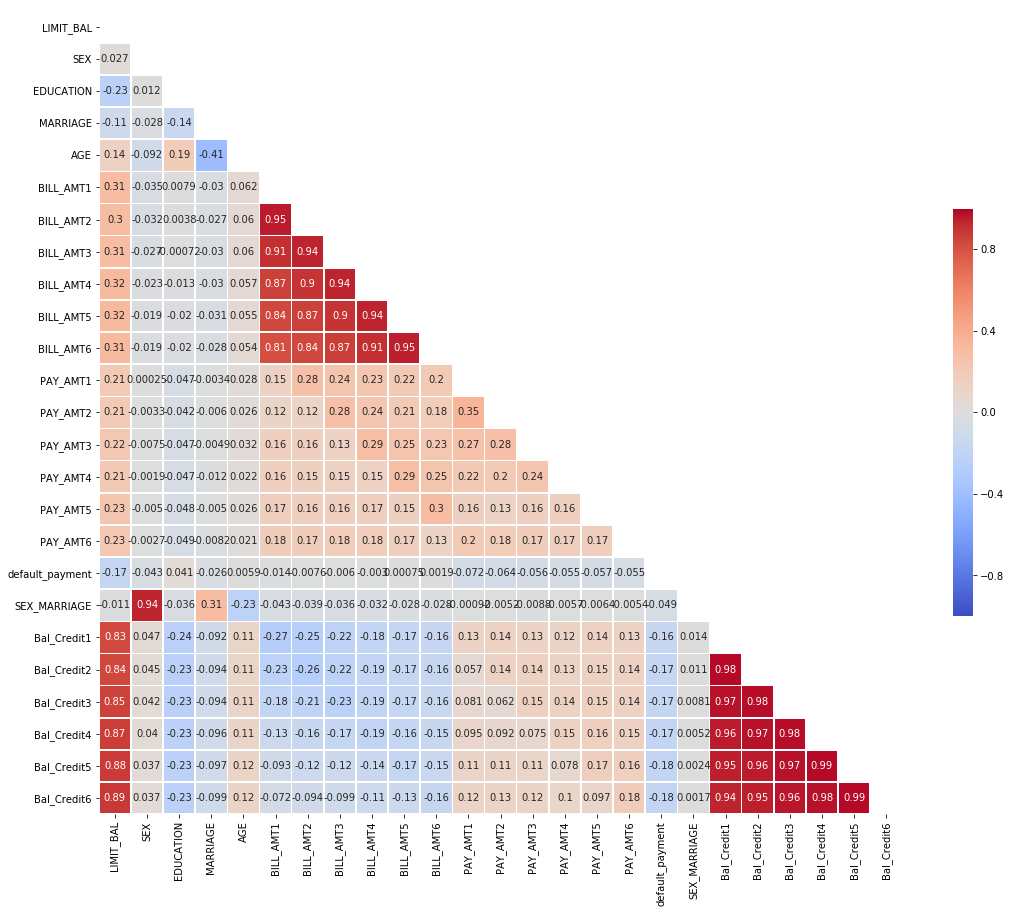

In [153]:
corr = data1.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, ax = ax, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

- default_payment has very less correlation with AGE, BILL_AMT2...6 variables

In [154]:
# Balance Credit = Limit bal to the bill_amt

data1['Due1'] = (data1.BILL_AMT1 - data1.PAY_AMT1)
data1['Due2'] = (data1.BILL_AMT2 - data1.PAY_AMT2)
data1['Due3'] = (data1.BILL_AMT3 - data1.PAY_AMT3)
data1['Due4'] = (data1.BILL_AMT4 - data1.PAY_AMT4)
data1['Due5'] = (data1.BILL_AMT5 - data1.PAY_AMT5)
data1['Due6'] = (data1.BILL_AMT6 - data1.PAY_AMT6)

In [155]:
print(data1[['Due1','Due2','Due3','Due4','Due5','Due6']].corrwith(data1['default_payment']))

Due1    0.001893
Due2    0.009959
Due3    0.007791
Due4    0.009715
Due5    0.014440
Due6    0.017601
dtype: float64


- Dropping the following variables based on their correlation with the target variable
    - Age, Bill_Amt2...6, Due1, Due2, Due3

In [156]:
data1 = data1.drop(columns=['AGE','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Due1','Due2','Due3'])
data1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,SEX_MARRIAGE,Bal_Credit1,Bal_Credit2,Bal_Credit3,Bal_Credit4,Bal_Credit5,Bal_Credit6,Due4,Due5,Due6
0,20000,2,2,1,3913,0,689,0,0,0,...,4,16087,16898,19311,20000,20000,20000,0,0,0
1,120000,2,2,2,2682,0,1000,1000,1000,0,...,5,117318,118275,117318,116728,116545,116739,2272,3455,1261


#### Dummy Variables

In [157]:
data3 = data1.copy()

In [158]:
data3.SEX = data3.SEX.astype(str)
data3.EDUCATION = data3.EDUCATION.astype(str)
data3.MARRIAGE = data3.MARRIAGE.astype(str)
data3.SEX_MARRIAGE = data3.SEX_MARRIAGE.astype(str)

In [159]:
cont_vars = data3.select_dtypes(include=['int64'])

In [160]:
obj_data = data3.select_dtypes(include=['object']).copy()
obj_data = pd.get_dummies(obj_data, prefix=['Sex', 'Education','Marriage','Sex_Marriage'])
obj_data.head()

,Sex_1,Sex_2,Education_1,Education_2,Education_3,Education_4,Marriage_1,Marriage_2,Marriage_3,Sex_Marriage_1,Sex_Marriage_2,Sex_Marriage_3,Sex_Marriage_4,Sex_Marriage_5,Sex_Marriage_6
0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [161]:
cont_vars.reset_index(drop=True, inplace=True)
obj_data.reset_index(drop=True, inplace=True)
df3 = pd.concat([cont_vars,obj_data], axis=1)
df3.head(2)

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Bal_Credit1,...,Education_4,Marriage_1,Marriage_2,Marriage_3,Sex_Marriage_1,Sex_Marriage_2,Sex_Marriage_3,Sex_Marriage_4,Sex_Marriage_5,Sex_Marriage_6
0,20000,3913,0,689,0,0,0,0,1,16087,...,0,1,0,0,0,0,0,1,0,0
1,120000,2682,0,1000,1000,1000,0,2000,1,117318,...,0,0,1,0,0,0,0,0,1,0


#### Test-train split 

In [162]:
x = df3.drop(columns = ['default_payment'])
y = df3['default_payment']

In [163]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

#### Class Imbalance

- Some Rules of Thumb:
    - Consider testing under-sampling when you have a lot of data (tens- or hundreds of thousands of instances or more)
    - Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less)
    - Consider testing random and non-random (e.g. stratified) sampling schemes.
    - Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)

- Up-sampling
    - randomly duplicating observations from the minority class in order to reinforce its signal
- Down-sampling
    - randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm
    
Upsampling has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperforms downsampling. Downsampling can discard potentially useful information and the sample can be biased, but it helps improving the run time

- Synthetic sampling - Smote - Synthetic Minority Oversampling Technique
    - It is an oversampling method which creates synthetic samples from the minority class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances

In [164]:
ytrain.value_counts()

0    17555
1     4907
Name: default_payment, dtype: int64

In [165]:
sm = SMOTE(ratio='auto')
xtrain, ytrain = sm.fit_sample(xtrain, ytrain)

In [166]:
np.shape(xtrain)

(35110, 32)

In [167]:
unique, counts = np.unique(ytrain, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 17555]
 [    1 17555]]


#### Modeling

In [168]:
def cross_val(clf, xtrain, ytrain, ytest, ypred1, ypred):
    score1 = cross_val_score(clf, xtrain, ytrain, cv=10, scoring='accuracy')
    score2 = cross_val_score(clf, xtrain, ytrain, cv=10, scoring='precision')
    score3 = cross_val_score(clf, xtrain, ytrain, cv=10, scoring='recall')
    score4 = cross_val_score(clf, xtrain, ytrain, cv=10, scoring='roc_auc')
    print('Train Error: ', 1-accuracy_score(ytrain, ypred1))
    print('Test Error: ', 1-accuracy_score(ytest, ypred))
    print("CV Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std()))
    print("CV Precision: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std()))
    print("CV Recall: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std()))
    print("CV roc_auc: %0.2f (+/- %0.2f)" % (score4.mean(), score4.std()))
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    return

In [169]:
def auc_roc (ytest, ypred):
    fpr,tpr,roc_auc = dict(),dict(),dict()
    fpr, tpr, _ = roc_curve(ytest, ypred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='red',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return

In [170]:
def learning_curves(estimator, title, xtrain, ytrain, ylim=None, cv=10, scoring='accuracy', obj_line=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, xtrain, ytrain, cv=10, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")
    if obj_line:
        plt.axhline(y=obj_line, color='blue')
    plt.legend(loc="best")
    return plt

In [171]:
def logistic_reg(xtrain, ytrain, xtest, ytest):
    #cv = StratifiedKFold(n_splits=12)
    #sizes = np.linspace(0.3, 1.0, 10)
    logitr = LogisticRegression(solver='lbfgs')
    logist_model = logitr.fit(xtrain, ytrain)
    #model = learning_curve(logitr,cv=cv,scoring='f1_weighted',train_sizes=sizes,n_jobs=4)
    #model.fit(xtrain,ytrain)
    #model.show()
    ypred1 = logist_model.predict(xtrain)
    ypred = logist_model.predict(xtest)
    auc_roc(ytest,ypred)
    print(classification_report(ytest,ypred))
    cross_val(logist_model, xtrain, ytrain, ytest, ypred1, ypred)
    return

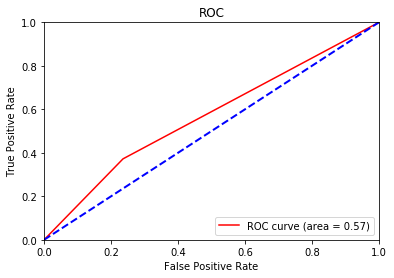

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4402
           1       0.30      0.37      0.33      1214

    accuracy                           0.68      5616
   macro avg       0.56      0.57      0.56      5616
weighted avg       0.70      0.68      0.69      5616

Train Error:  0.4181714611221874
Test Error:  0.3205128205128205
CV Accuracy: 0.58 (+/- 0.01)
CV Precision: 0.63 (+/- 0.01)
CV Recall: 0.39 (+/- 0.01)
CV roc_auc: 0.66 (+/- 0.01)
[[3364 1038]
 [ 762  452]]


In [175]:
logistic_reg(xtrain,ytrain,xtest,ytest)

In [173]:
# TP  FN
# FP  TN
# Actual not default and predicted not default = 3364 = TP
# Actual default and predicted not default = 762 = FN
# Actual default and predicted default = 452 = TN
# Actual not default and predicted default = 1038 = FP